In [2]:
import pandas as pd
import glob
import re
import math
import urllib.request
# from bs4 import BeautifulSoup
from operator import itemgetter
import networkx as nx
import csv
import os
import matplotlib.pyplot as plt


def native_vote_csv_df():
    # filepath = "/Users/tdt62/Desktop/test_data/2018_10_*vote*"
    list_ = []

#     filepath = "/projects/canis/nativevote18/twitter/data/2018_10*stream_1*"
    filepath = "/Users/thatcher/Documents/Graduate School/Research/GraduateResearch/test_data/2018_10_*vote*"

    # Takes all of the csv file and makes one big dataframe
    for name in glob.glob(filepath):
        if(os.stat(name).st_size == 0) == True:
            continue
        else:
            df = pd.read_csv(name,index_col=None, header=0)
            list_.append(df)

#     filepath = "/projects/canis/nativevote18/twitter/data/2018_11*stream_1*"
# #     filepath = "/Users/tdt62/Desktop/GraduateResearch/test_data/2018_11_*vote*"

#     # Takes all of the csv file and makes one big dataframe
#     for name in glob.glob(filepath):
#         if(os.stat(name).st_size == 0) == True:
#             continue
#         else:
#             df = pd.read_csv(name,index_col=None, header=0)
#             list_.append(df)

#     filepath = "/projects/canis/nativevote18/twitter/data/2018_12*stream_1*"
# #     filepath = "/Users/tdt62/Desktop/test_data/2018_12_01*vote*"

#         # Takes all of the csv file and makes one big dataframe
#         for name in glob.glob(filepath):
#             if(os.stat(name).st_size == 0) == True:
#                 continue
#             else:
#                 df = pd.read_csv(name,index_col=None, header=0)
#                 list_.append(df)

#         filepath = "/projects/canis/nativevote18/twitter/data/2019_01*stream_1*"

#     # Takes all of the csv file and makes one big dataframe
#     for name in glob.glob(filepath):
#         if(os.stat(name).st_size == 0) == True:
#             continue
#         else:
#             df = pd.read_csv(name,index_col=None, header=0)
#             list_.append(df)

    # Makes the big df in memory
    frame = pd.concat(list_, axis = 0, ignore_index = True)
    frame.fillna("NA", inplace=True)
    return frame

def total_tweets(df):

    # Gets the total number of tweets
    total_tweets_num = df.shape[0]  # gives number of row count
    return total_tweets_num

def unique_tweets(df):

    # Gets the unique tweets i.e. no retweeted status
    df['rt_isdigit'] = list(map(lambda x: str(x).isdigit(), df['Retweeted_Status']))
    unique_df = df.loc[df['rt_isdigit'] == False]
    return unique_df

def unique_users(df):
    unique_users = len(df.User_ID.unique())
    return unique_users

def original_content_user(df):

    # Gets the unique tweets i.e. no retweeted status
    df['rt_isdigit'] = list(map(lambda x: str(x).isdigit(), df['Retweeted_Status']))
    unique_df = df.loc[df['rt_isdigit'] == False]
    unique_users = len(unique_df.User_ID.unique())
    return unique_users

def hashtags(df, top_val):

    top_list = []
    hashtag_dict = {}

    def iterate_hashtags(x):
        hashtag_list = list(x.split("'text':"))
        for element in hashtag_list:
            stripped_element = element.split(',')[0].strip("' '{}[]")
            if stripped_element in hashtag_dict and stripped_element != '[]' and stripped_element != 'NA' and stripped_element != '':
                hashtag_dict[stripped_element] += 1
            else:
                hashtag_dict[stripped_element] = 1

    # Create the hashtag dict
    list(map(lambda x: iterate_hashtags(x), df['Hashtags']))

    # Gets the sorted news_list in descending order
    sorted_news_list = (list(sorted(hashtag_dict.items(), key=itemgetter(1), reverse=True)))

    # Gets the top 20 results of the sorted list
    sorted_news_list = sorted_news_list[0:top_val]

    # Stores all the names in a list, so we can read correctky
    for item in sorted_news_list:
        top_list.append(item[0])

    return top_list, sorted_news_list

def make_domain_csv(top_news_dict):
    with open('news_domains.csv', 'w') as csv_file:
        writer = csv.writer(csv_file)
        for key, value in top_news_dict.items():
            writer.writerow([key, value])

def top_user_mentions(df, top_val):

    top_users_list = []
    hashtag_dict = {}

    def iterate_user_mentions(x):

        hashtag_list = list(x.split("'screen_name':"))
        for element in hashtag_list:
            stripped_element = element.split(',')[0].strip("' '{}[]")
            if stripped_element in hashtag_dict and stripped_element != '[]' and stripped_element != 'NA' and stripped_element != '':
                hashtag_dict[stripped_element] += 1
            else:
                hashtag_dict[stripped_element] = 1

    # Create the hashtag dict
    list(map(lambda x: iterate_user_mentions(x), df['User_Mentions']))

    # Gets the sorted news_list in descending order
    sorted_news_list = (list(sorted(hashtag_dict.items(), key=itemgetter(1), reverse=True)))

    # Gets the top 20 results of the sorted list
    sorted_news_list = sorted_news_list[0:top_val]

    # Stores all the names in a list, so we can read correctky
    for item in sorted_news_list:
        top_users_list.append(item[0])

    return top_users_list, sorted_news_list

def get_hashtag_users_df(df):
        hashtag_users_df = df.loc[(df['User_Mentions'] != '[]') & (df['Hashtags'] != '[]')]
        return hashtag_users_df

def build_mentions_dict(df):

    def make_csv(user_hashtag_dict):
        with open('user_hashtag.csv', 'w') as csv_file:
            writer = csv.writer(csv_file)
            for key, value in user_hashtag_dict.items():
                writer.writerow([key, value])

    def make_lists(df):
        user_list = list(df['User_Mentions'].split("'screen_name':"))
        hashtag_list = list(df['Hashtags'].split("'text':"))



    user_list = list(df['User_Mentions'].split("'screen_name':"))
    hashtag_list = list(df['Hashtags'].split("'text':"))

    for user in user_list:
        stripped_user = user.split(',')[0].strip("' '{}[]")
        if stripped_user != '[]' and stripped_user != 'NA' and stripped_user != '':
            for hashtag in hashtag_list:
                stripped_hashtag = hashtag.split(',')[0].strip("' '{}[]")
                if stripped_hashtag != '[]' and stripped_hashtag != 'NA' and stripped_hashtag != '':
                    dict_tuple = (stripped_user, stripped_hashtag)
                    if(dict_tuple in user_hashtag_dict):
                        user_hashtag_dict[dict_tuple] += 1
                    else:
                        user_hashtag_dict[dict_tuple] = 1
    make_csv(user_hashtag_dict)
    return user_hashtag_dict

In [3]:
native_df = native_vote_csv_df()

unique_df = unique_tweets(native_df)

hashtag_user_df = get_hashtag_users_df(unique_df)

user_hashtag_dict = {}

def build_mentions_dict(df):
    
    def make_csv(user_hashtag_dict):
        with open('/Users/thatcher/Documents/Graduate School/Research/GraduateResearch/test_data/user_hashtag.csv', 'w') as csv_file:
            writer = csv.writer(csv_file)
            for key, value in user_hashtag_dict.items():
                writer.writerow([key, value])
            
    
    user_list = list(df['User_Mentions'].split("'screen_name':"))
    hashtag_list = list(df['Hashtags'].split("'text':"))
    print(user_list, '\n\n')
                        
    for user in user_list:
        stripped_user = user.split(',')[0].strip("' '{}[]")
        if stripped_user != '[]' and stripped_user != 'NA' and stripped_user != '':
            for hashtag in hashtag_list:
                stripped_hashtag = hashtag.split(',')[0].strip("' '{}[]")
                if stripped_hashtag != '[]' and stripped_hashtag != 'NA' and stripped_hashtag != '':
                    dict_tuple = (stripped_user, stripped_hashtag)
#                     print(dict_tuple)
                    if(dict_tuple in user_hashtag_dict):
                        user_hashtag_dict[dict_tuple] += 1
                    else:
                        user_hashtag_dict[dict_tuple] = 1
    make_csv(user_hashtag_dict)
    return user_hashtag_dict
                        


            
hashtag_user_df.apply(build_mentions_dict, axis=1)

['[{', " 'rep', 'name': 'ななし', 'id': 6974932, 'id_str': '6974932', 'indices': [32, 36]}]"] 


['[{', " 'RepMullin', 'name': 'Markwayne Mullin', 'id': 1060370282, 'id_str': '1060370282', 'indices': [0, 10]}, {", " 'MichaelAvenatti', 'name': 'Michael Avenatti', 'id': 251918778, 'id_str': '251918778', 'indices': [11, 27]}, {", " 'DonaldJTrumpJr', 'name': 'Donald Trump Jr.', 'id': 39344374, 'id_str': '39344374', 'indices': [28, 43]}, {", " 'jn4ush', 'name': 'Jason Nichols for Congress', 'id': 899371613396893696, 'id_str': '899371613396893696', 'indices': [85, 92]}]"] 


['[{', " 'authorandijaxon', 'name': 'Andi Jaxon', 'id': 954422190442606592, 'id_str': '954422190442606592', 'indices': [74, 90]}, {", " 'AJAlexander16', 'name': 'AJ Alexander', 'id': 996125833193406465, 'id_str': '996125833193406465', 'indices': [91, 105]}]"] 




21     {('rep', 'oklaed'): 1, ('RepMullin', 'VoteBlue...
161    {('rep', 'oklaed'): 1, ('RepMullin', 'VoteBlue...
292    {('rep', 'oklaed'): 1, ('RepMullin', 'VoteBlue...
dtype: object

--- Jaccard ---
oklaed, rep: 0.0
VoteBlue, RepMullin: 0.0
Embarrassment, RepMullin: 0.0
VoteBlue, MichaelAvenatti: 0.0
Embarrassment, MichaelAvenatti: 0.0
VoteBlue, DonaldJTrumpJr: 0.0
Embarrassment, DonaldJTrumpJr: 0.0
VoteBlue, jn4ush: 0.0
Embarrassment, jn4ush: 0.0
Teaser, authorandijaxon: 0.0
Teaser, AJAlexander16: 0.0
--- Jaccard ---




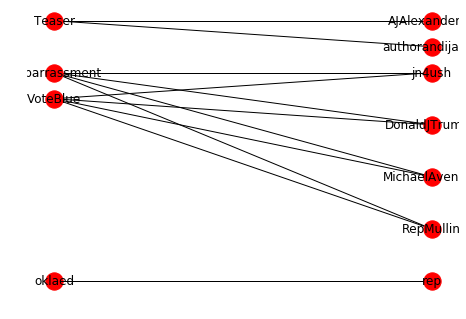

In [11]:
df = pd.read_csv("/Users/thatcher/Documents/Graduate School/Research/GraduateResearch/test_data/user_hashtag.csv", names=['User_Hashtag', 'Count'])
df

B = nx.Graph()
# Add nodes with the node attribute "bipartite"
bi1_list = []
bi2_list = []

for val in df['User_Hashtag']:
    x = val.split(',')
#     print(x[0].strip())
    bi1_list.append(x[0].strip(" ''()"))
    bi2_list.append(x[1].strip(" ''()"))
    
B.add_nodes_from(set(bi1_list), bipartite=1)
B.add_nodes_from(set(bi2_list), bipartite=0)
B.add_edges_from(list(zip(bi1_list, bi2_list)))

pos = {}

# Update position for node from each group
pos.update((node, (1, index)) for index, node in enumerate(bi2_list))
pos.update((node, (2, index)) for index, node in enumerate(bi1_list))
preds = nx.jaccard_coefficient(B, list(zip(bi2_list, bi1_list)))
print("--- Jaccard ---")
for n1, n2, j in preds:
    print("{}, {}: {}".format(n1, n2, j))
print("--- Jaccard ---\n\n")
nx.draw(B, pos=pos, with_labels = True)
# nx.bipartite.sets(B, top_nodes=bi1_list)
# G = nx.bipartite.weighted_projected_graph(B, bi1_list)
# nx.draw(G, with_labels = True)
# plt.show()